In [1]:
%config Completer.use_jedi = False

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/kaggle/input/world-happiness-report/'

data_2015 = pd.read_csv(os.path.join(path, '2015.csv'))
data_2017 = pd.read_csv(os.path.join(path,'2017.csv'))
data_2018 = pd.read_csv(os.path.join(path,'2018.csv'))


In [4]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# 2017

In [15]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

<AxesSubplot:>

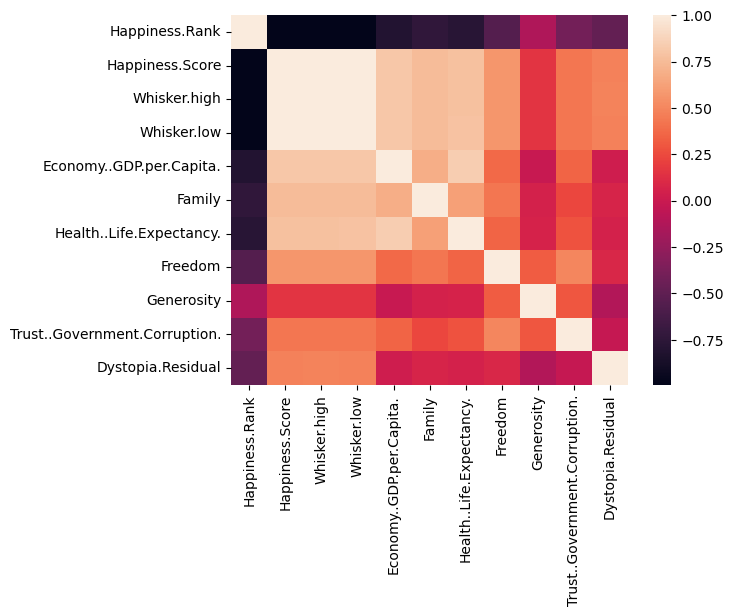

In [5]:
sns.heatmap(data_2017.corr())

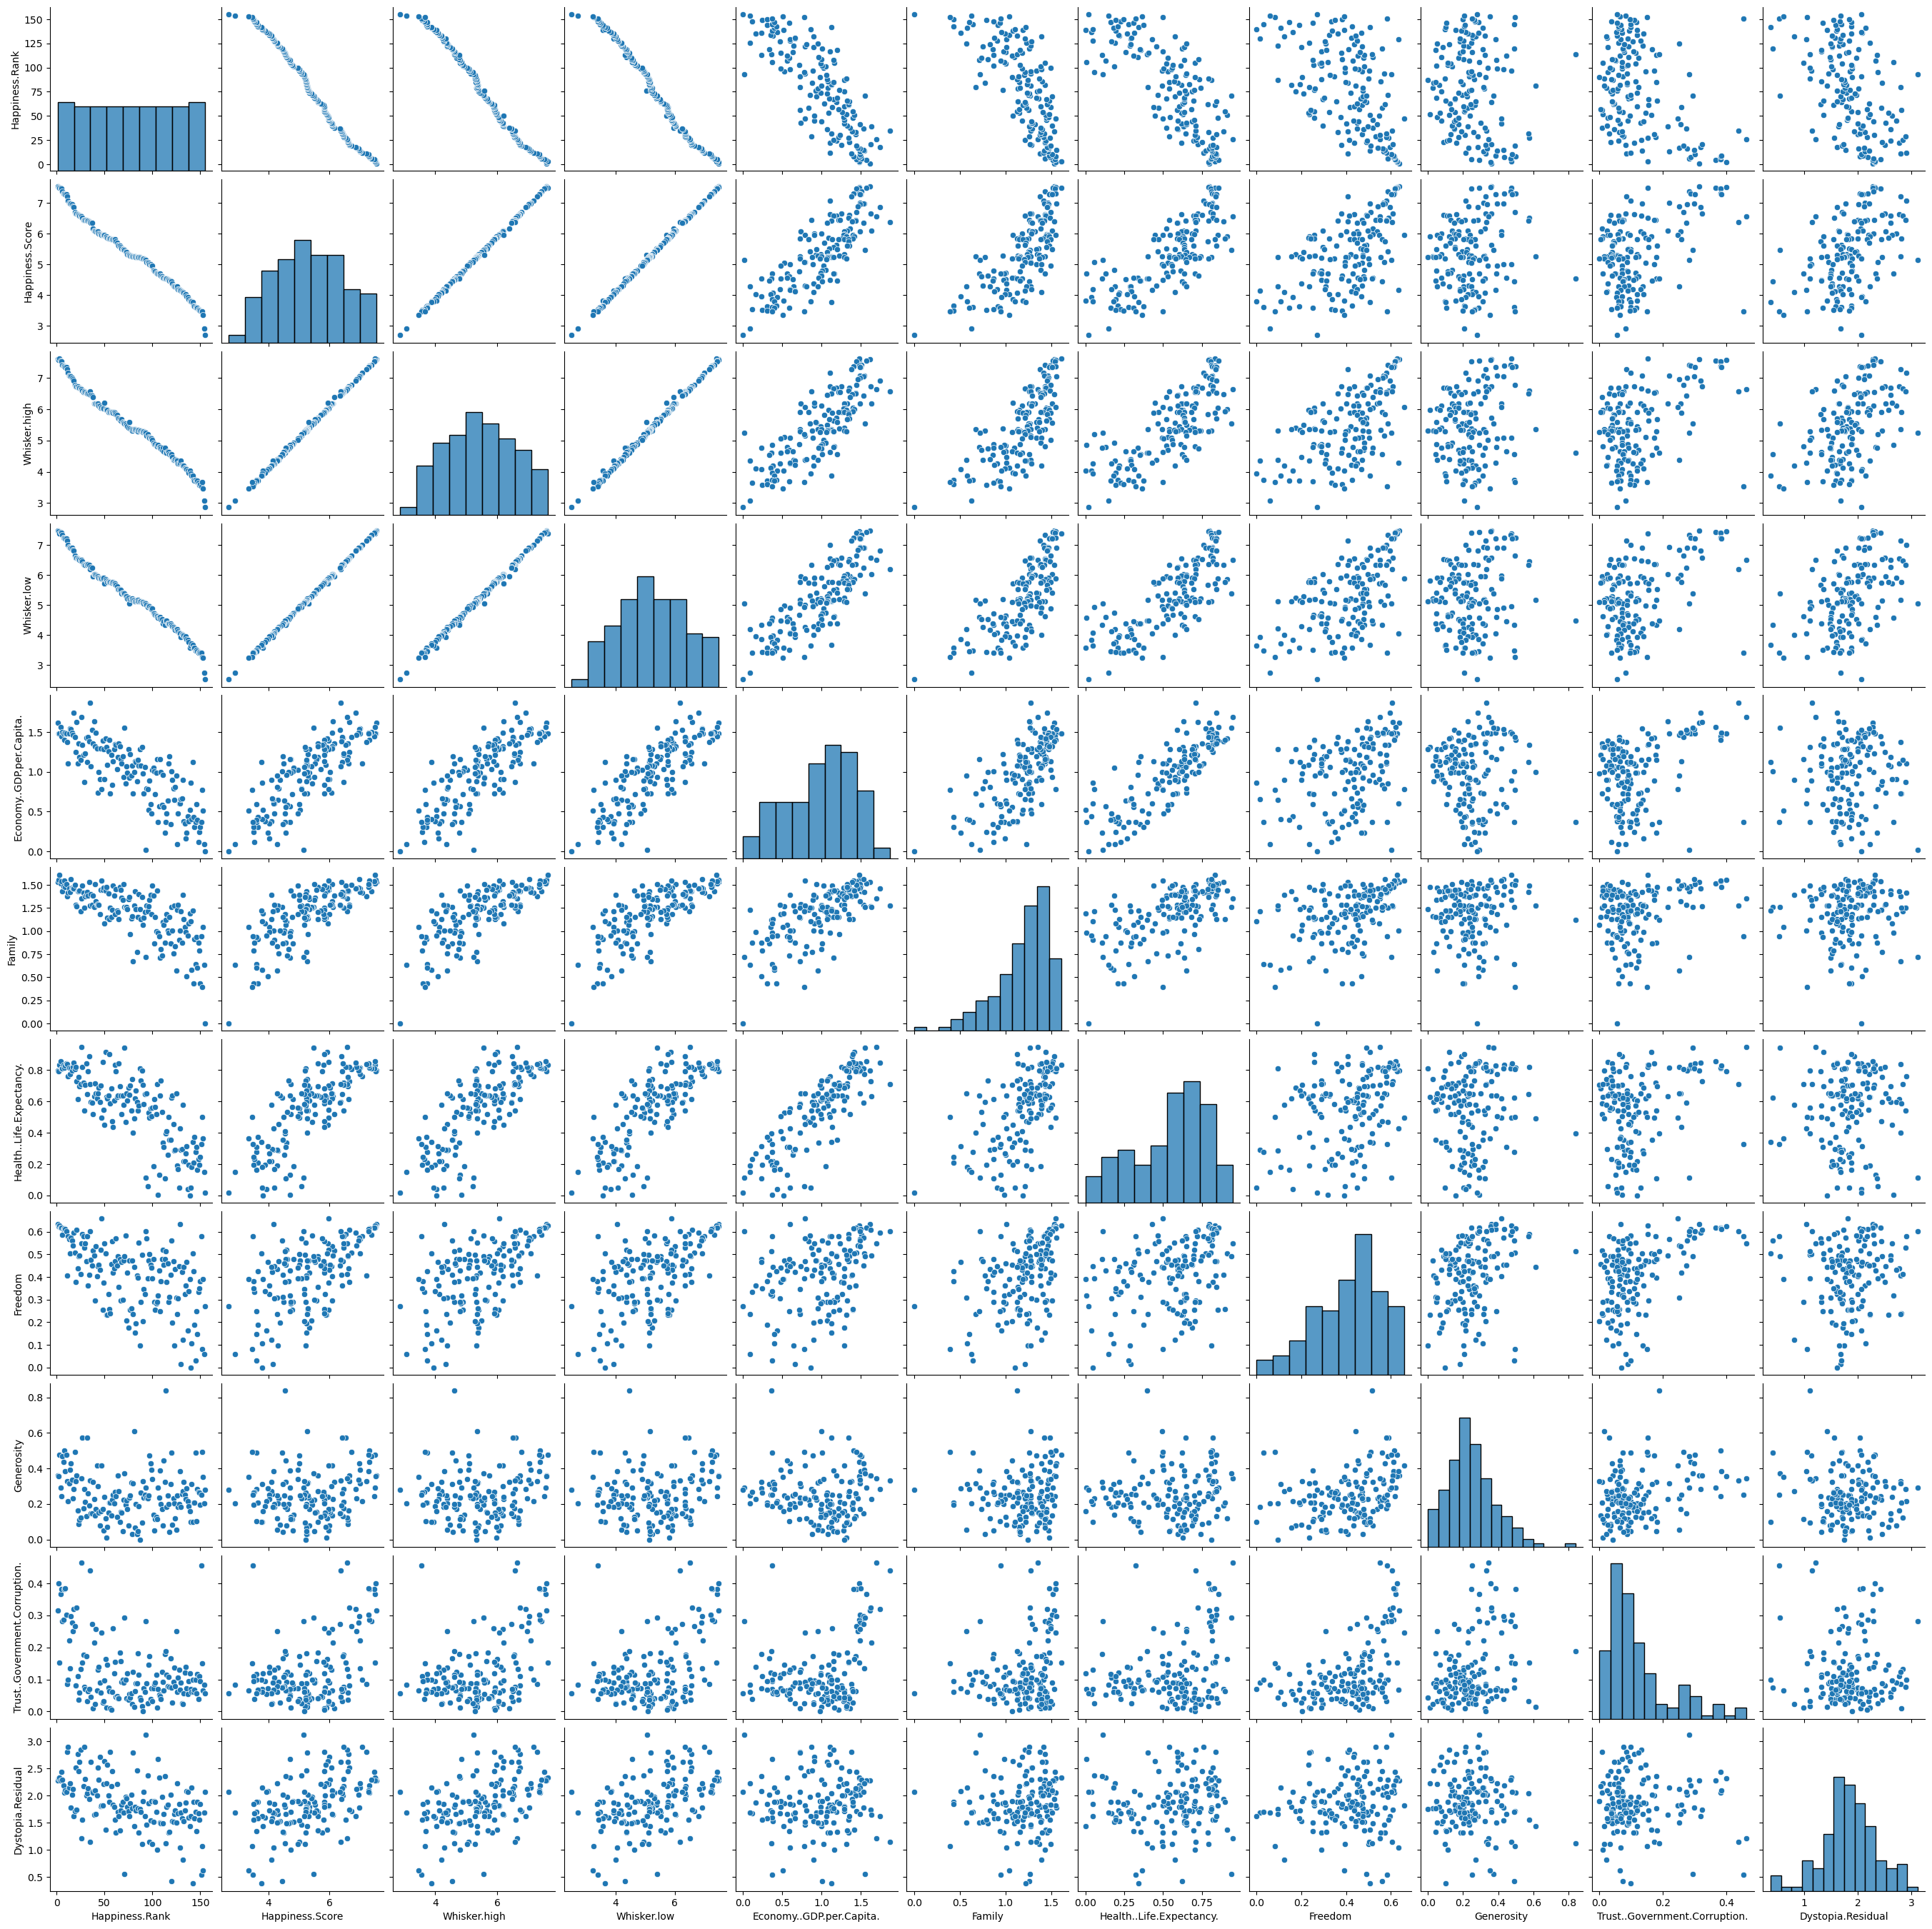

In [45]:
sns.pairplot(data_2017)

* 랭킹이 높을수록(낮을수록) 확실히 점수가 높다
* GDP, Family, Health 가 점수랑 확실히 양의 상관관계가 있는게 눈에 보임.

In [29]:
top_2017 = data_2017[['Happiness.Score', 'Country', 'Happiness.Rank']].sort_values(by='Happiness.Rank')[:30]

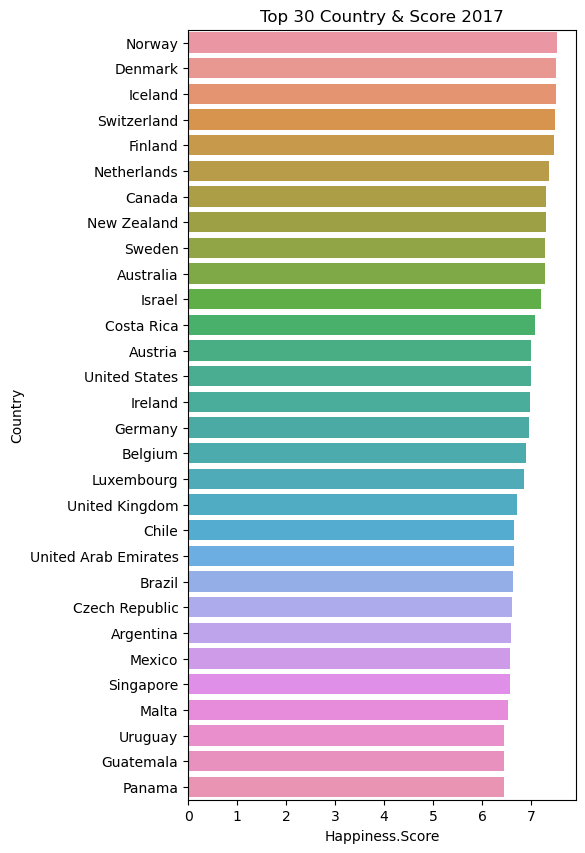

In [33]:
plt.figure(figsize=(5, 10))
plt.title('Top 30 Country & Score 2017')
sns.barplot(y='Country', x='Happiness.Score', data=top_2017)
plt.show()

# 2018

In [28]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


<AxesSubplot:>

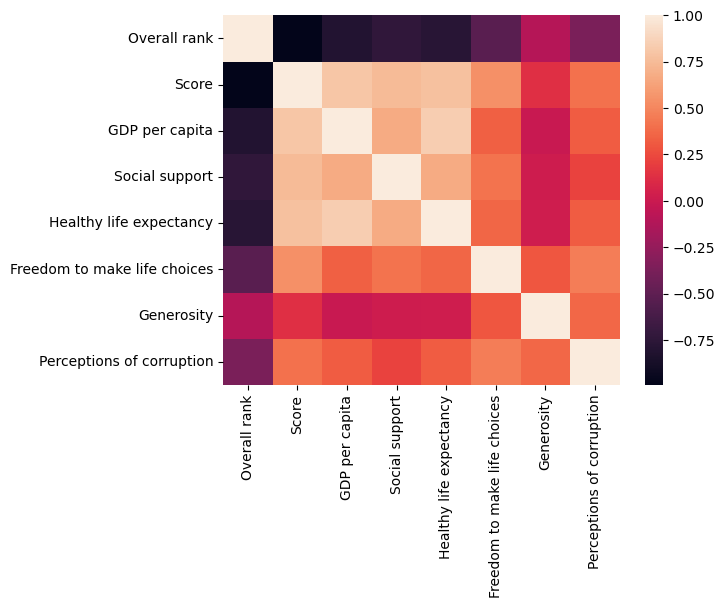

In [44]:
sns.heatmap(data_2018.corr())

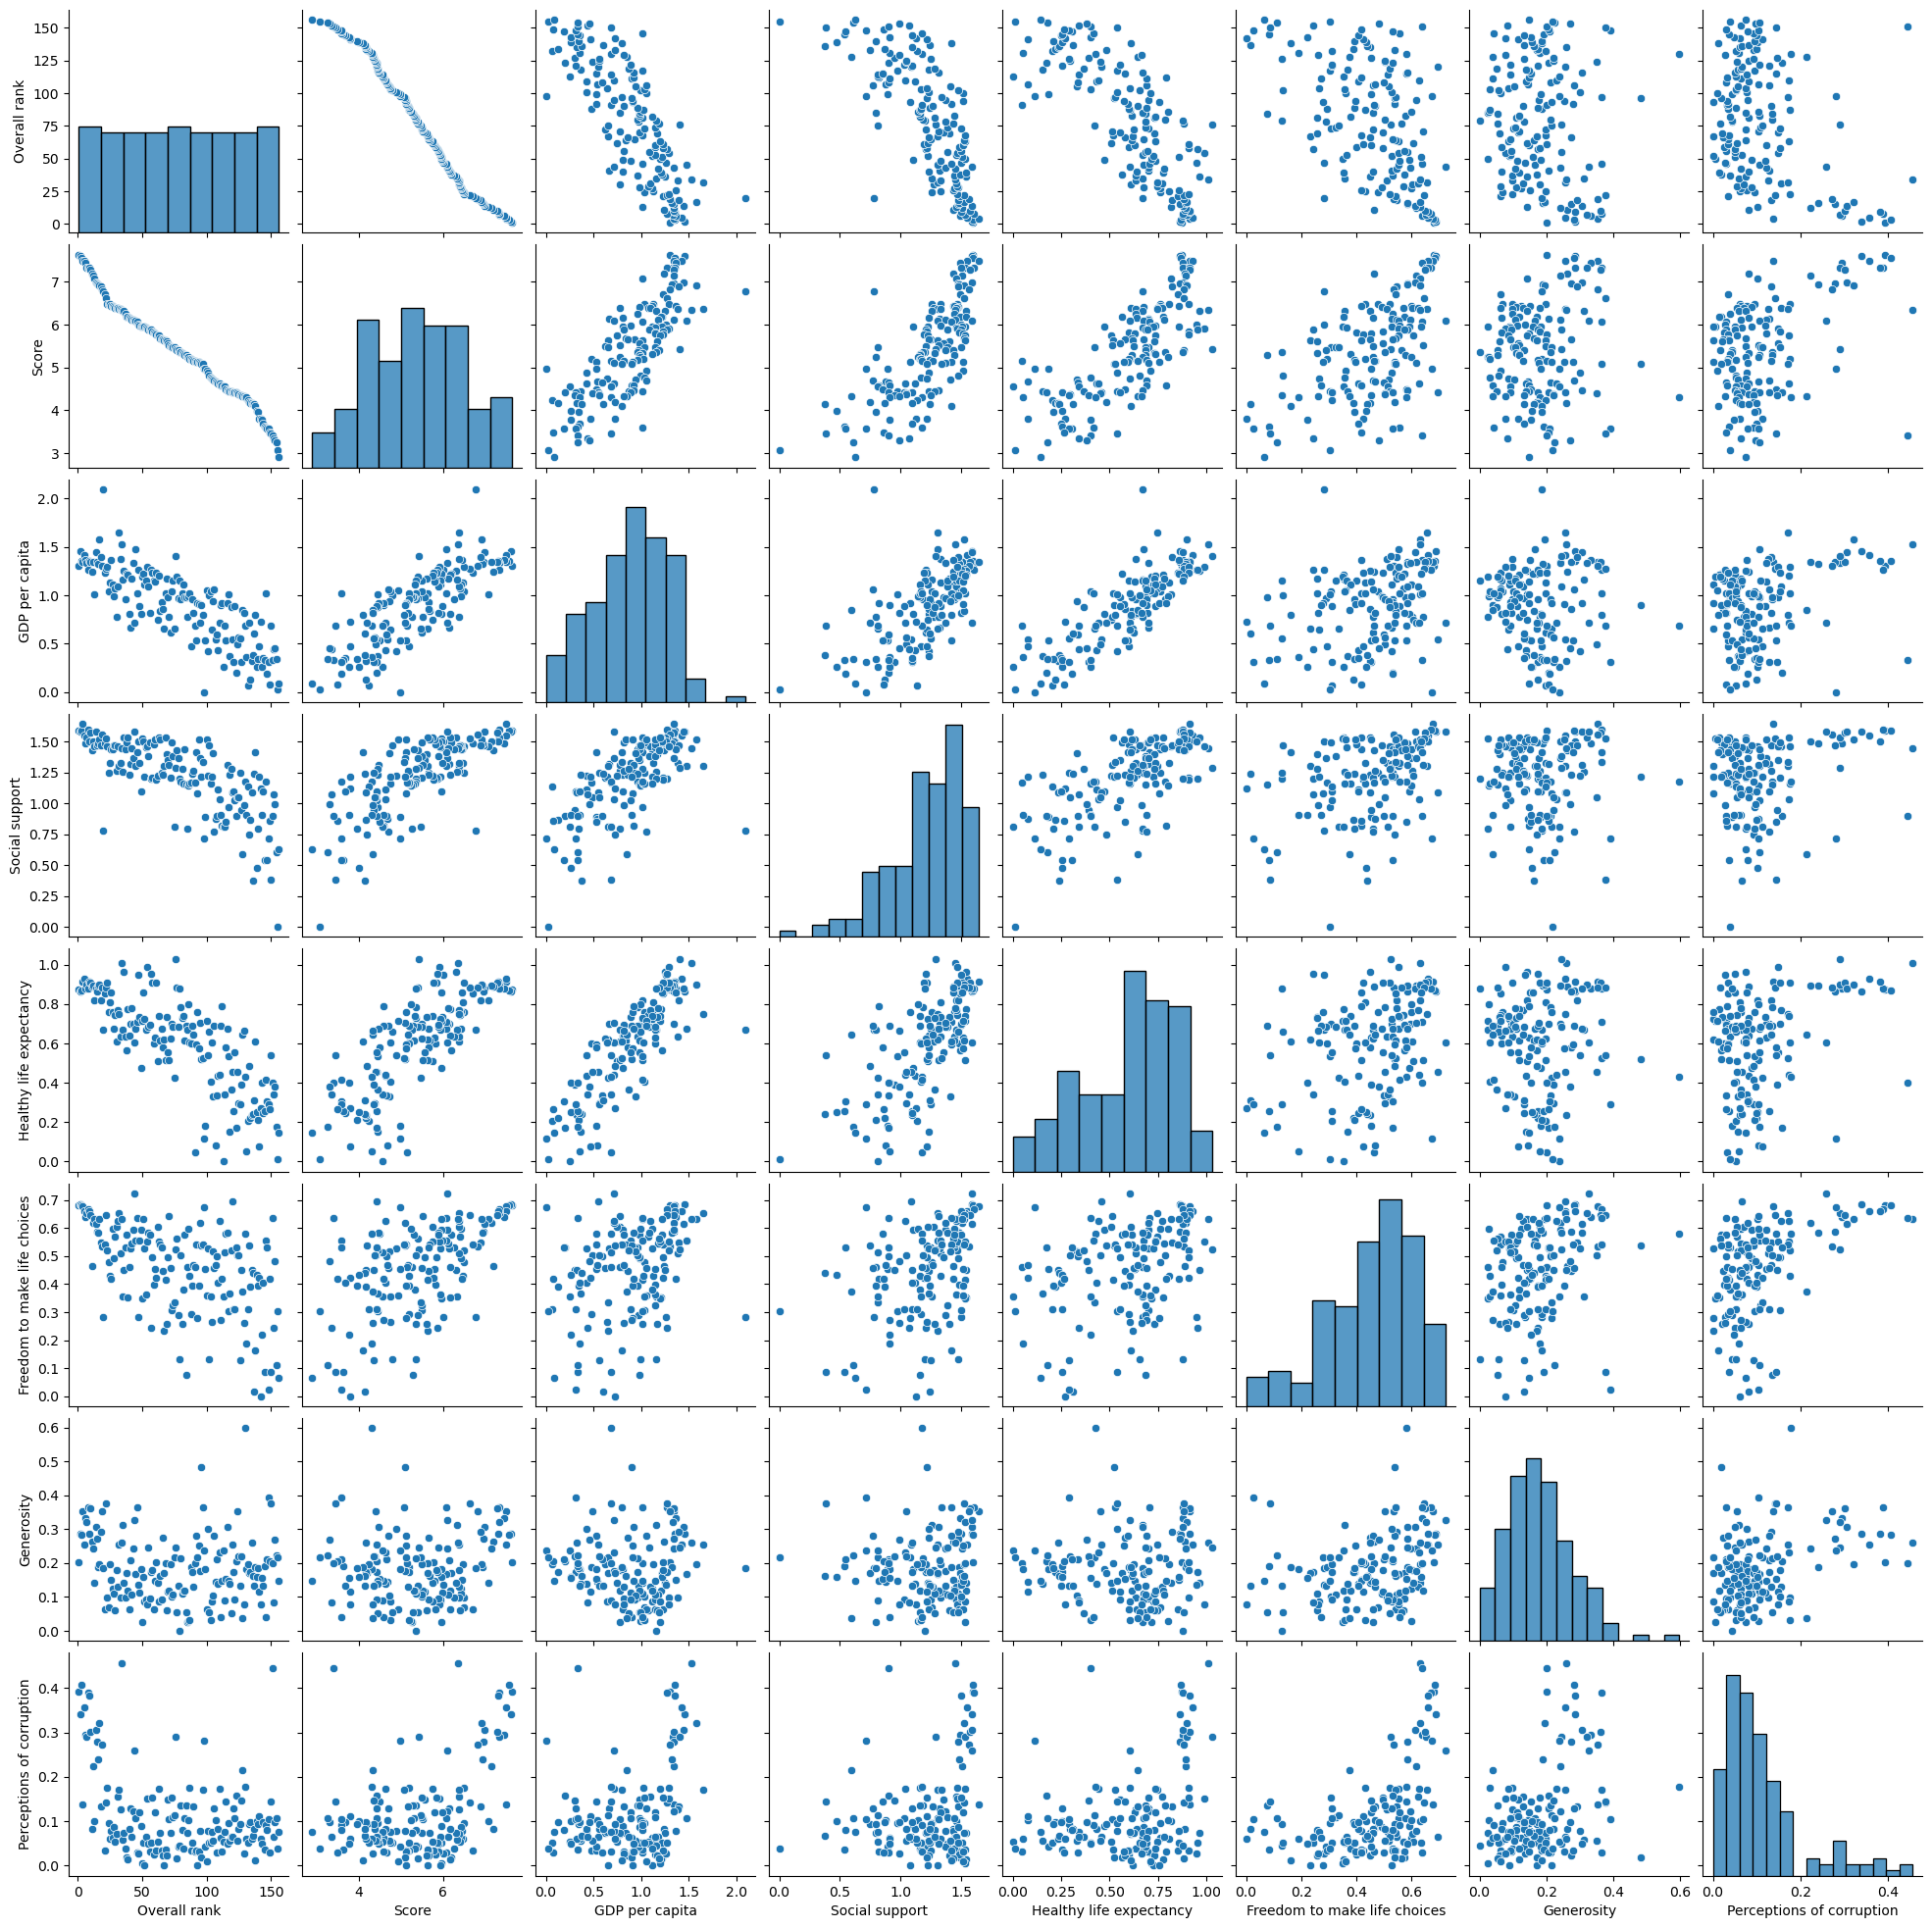

In [47]:
sns.pairplot(data_2018)

* 2017년과 마찬가지 양상을 보여주는듯 함

In [40]:
top_2018 = data_2018[['Overall rank', 'Score', 'Country or region']].sort_values(by='Overall rank')[:30]

In [41]:
top_2018

,Overall rank,Score,Country or region
0,1,7.632,Finland
1,2,7.594,Norway
2,3,7.555,Denmark
3,4,7.495,Iceland
4,5,7.487,Switzerland
5,6,7.441,Netherlands
6,7,7.328,Canada
7,8,7.324,New Zealand
8,9,7.314,Sweden
9,10,7.272,Australia


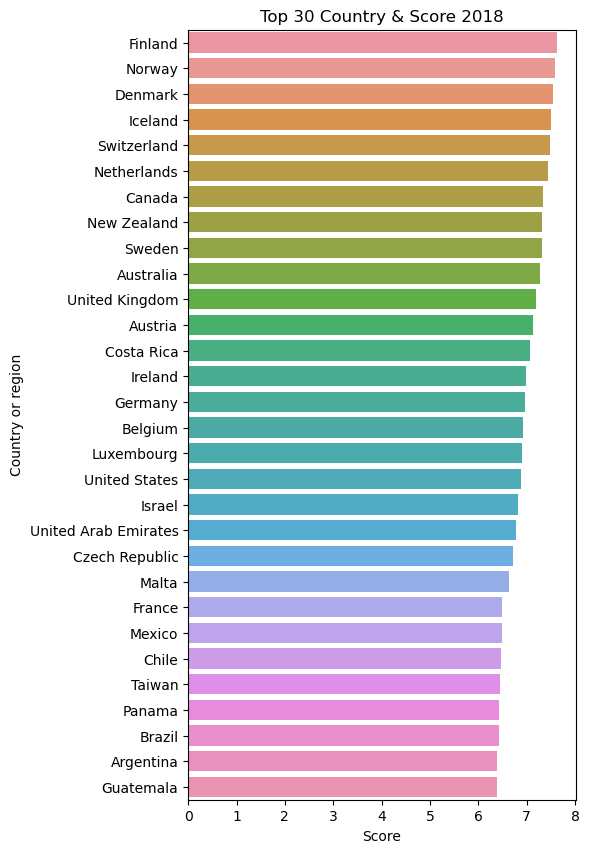

In [43]:
plt.figure(figsize=(5, 10))
plt.title('Top 30 Country & Score 2018')
sns.barplot(y='Country or region', x='Score', data=top_2018)
plt.show()

In [51]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type='choropleth',
            locations = data_2017["Country"],
            locationmode = 'country names',
            z = data_2017["Happiness.Score"],
            text = data_2017["Country"],
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "2017 Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

In [52]:
data = dict(type='choropleth',
            locations = data_2018["Country or region"],
            locationmode = 'country names',
            z = data_2018["Score"],
            text = data_2018["Country or region"],
            colorbar = {"title":"Happiness Score"})

layout = dict(title = "2018 Geographical Visualization of Happiness Score",
              geo = dict(showframe = True, projection = {"type" : "azimuthal equal area"}))

happiness_map = go.Figure(data = [data], layout=layout)
iplot(happiness_map)

In [53]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [55]:
data_2017[data_2017['Country'] == 'South Korea']

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
54,South Korea,55,5.838,5.922559,5.753441,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378


In [56]:
data_2018[data_2018['Country or region'] == 'South Korea']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
56,57,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051
